# Code of each figure
Note that:
1. gamma = 300 is ofter treater differently since those runs are saved with a different file name
2. for each mu (gamma != 300), the gamma values are saved alternately 


gamma=0.3: runnumbers: 1, 5, 9, 13 <br>
gamma=3: runnumbers: 2, 6, 10, 14 <br>
gamma=3: runnumbers: 3, 7, 11, 15 <br>
gamma=3: runnumbers: 4, 8, 12, 16 <br>


In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import statistics as stat
from pylab import *
from matplotlib.ticker import ScalarFormatter

# Figure 3.1 a: difference in volume between upper and lowe half of well

In [ ]:
mu = ['0.01', '0.03', '0.05', '0.1', '0.5']
gamma = ['0.3', '3', '30', '50', '300'] 


def voldiff_func(mu, gamma):
    path = r'C:\Users\Wieke Joustra\Documents\BEP\cell_sorting_with_cc3d\Final_Results\volume_difference'
    filename = '\\volumedifference_mu' + mu + '_gamma' + gamma + '.csv'
    with open(path + filename) as f:
        reader = csv.reader(f, delimiter= ' ')
        for column in reader:        
            if column != 0:
                for row in reader:
                    lowervol = float(row[0])  #the average volume of EPI and PrE cells in the lower half of the well
                    uppervol = float(row[1]) #the average volume of EPI and PrE cells in the upper half of the well
                    #both at the last MCS

    voldiff_value.append(lowervol-uppervol) #fill the 1x1 matrix with the difference between upper and lower volume
    
#make a figure
fig = plt.figure(figsize=(7.2,6))

ax = fig.add_subplot()
ax.set_position([0.175,0.18,0.6,0.72]) # move image to left, move up, image width, image height

for currentmu in mu: 
    for currentgamma in gamma: #for each mu and gamma, we are calling the voldiff_func function 
        voldiff_value = [] #and make the array empty again
        voldiff_func(currentmu, currentgamma)
        
        #then add the difference in volume value to the figure 
        #scale it by s to make the dots visable
        ax.scatter(float(currentmu), float(currentgamma), s = float(voldiff_value[0])**2, c='black')
        
###############
#now specify all the plot characteristics 

labels = [13,14,15,16] #dots to show in the legend are 14,15,16    

for label in labels: #make the legend labels (scale by the same factor s)
    ax.scatter([], [], s=1.5*label**2, c="k", label=str(label))

h, l = plt.gca().get_legend_handles_labels() 
ax.legend(h[1:], l[1:], title_fontsize = 14, fontsize = 13, labelspacing=2, title="number \n of pixels", borderpad=1, 
           framealpha=0.5, edgecolor="k", bbox_to_anchor=(1.05, 1), loc= 'upper left') #define legend layout

ax.set_xscale('log')
ax.set_yscale('log')

xlabels = [float(value) for value in mu]
ax.set_xticks(xlabels)

ylabels =[float(value) for value in gamma]
ax.set_yticks(ylabels)

for axis in [ax.xaxis, ax.yaxis]: #to make sure that the x and yticks are not overwritten by the loglog ax-format
    axis.set_major_formatter(ScalarFormatter())

for tick in ax.xaxis.get_major_ticks(): #adjust x ax-labels
    tick.label.set_fontsize(13)
    tick.label.set_rotation(45)
    
for tick in ax.yaxis.get_major_ticks(): #adjust y ax-labels
    tick.label.set_fontsize(13)
    
plt.xlabel('\n \u03BC: chemotaxis strength ', fontsize = 20),
plt.ylabel(u'\u03B3\u2091\u209A: surface tension between \n EPI and PrE cells', 
                                                                     fontsize = 20)
ax.xaxis.set_label_coords(0.5, -0.1)

plt.savefig(r'C:\Users\Wieke Joustra\Documents\BEP\Figures\volumediffz.pdf') 

# Figure 3b: difference in volume betweeen EPI and PrE cells
#### For each MCS, the average EPI and PrE cell volume is saved
#### we plot the maximum difference in volume for each 'set' of 4 runs per variable combination

In [ ]:
mu = ['0.01', '0.03', '0.05', '0.1', '0.5']
gamma = ['0.3', '3', '30', '50', '300'] 


def BigLoopFunction(runnumber): 
    #we have this big function over the volumefunction since the volume function is called for both EPI and PrE cells
    EPIvolume = []
    PREvolume = []
    MCS_E = [] #could have used only one MCS-array
    MCS_P = []

    def volumefunction(filename, volume, MCS):
        #so in this function, the volumes of the cells are put in their array
        path = r'C:\Users\Wieke Joustra\Documents\BEP\cell_sorting_with_cc3d\Final_Results\Mu_' + currentmu + '\gamma_' + currentgamma
        with open(path + filename) as f:
            reader = csv.reader(f, delimiter= ' ')
            for column in reader:        
                if column != 0:
                    for row in reader:
                        volume.append(float(row[1]))
#                         surface.append(float(row[2])) #the surface is not used
                        MCS.append(float(row[0]))
                        
    if currentgamma == '300': #different filenames for gamma=300
        volumefunction('\\' + runnumber + '_vsEcells_mu' + currentmu + '_gamma' + currentgamma  + '.csv', EPIvolume, MCS_E)
        volumefunction('\\' + runnumber + '_vsPcells_mu' + currentmu + '_gamma' + currentgamma  + '.csv', PREvolume, MCS_P)
    else: 
        volumefunction('\\vsEcells_' + runnumber + '.csv', EPIvolume, MCS_E)
        volumefunction('\\vsPcells_' + runnumber + '.csv', PREvolume, MCS_P)
    
    #calculate the difference in volume between the EPi and Pre cells for each MCS
    difference_v = [abs(EPIvolume[value] - PREvolume[value]) for value in range(0, len(MCS_E))] 
    #and then extract the max value
    array_v.append(max(difference_v))

#make a figure
fig = plt.figure(figsize=(7.2,6))

ax = fig.add_subplot()
ax.set_position([0.175,0.18,0.6,0.72])


for currentmu in mu: 
    for currentgamma in gamma:
        array_v = [] #array that contains the max difference in volume between E and P cells for each gamma, mu combination. 
        #if gamma mu combination changes, the array is made empty and filled again. 
        if currentgamma == '0.3': 
            BigLoopFunction('run1')
            BigLoopFunction('run5')
            BigLoopFunction('run9')
            BigLoopFunction('run13')

        elif currentgamma == '3': 
            BigLoopFunction('run2')
            BigLoopFunction('run6')
            BigLoopFunction('run10')
            BigLoopFunction('run14')

        elif currentgamma == '30': 
            BigLoopFunction('run3')
            BigLoopFunction('run7')
            BigLoopFunction('run11')
            BigLoopFunction('run15')

        elif currentgamma == '50': 
            BigLoopFunction('run4')
            BigLoopFunction('run8')
            BigLoopFunction('run12')
            BigLoopFunction('run16')
                
        elif currentgamma == '300': 
            if currentmu == '0.01':
                BigLoopFunction('run1'), BigLoopFunction('run2'), BigLoopFunction('run3'), BigLoopFunction('run4')
            elif currentmu == '0.03': 
                BigLoopFunction('run5'), BigLoopFunction('run6'), BigLoopFunction('run7'), BigLoopFunction('run8')
            elif currentmu == '0.05':
                BigLoopFunction('run9'), BigLoopFunction('run10'), BigLoopFunction('run11'), BigLoopFunction('run12')
            elif currentmu == '0.1':
                BigLoopFunction('run13'), BigLoopFunction('run14'), BigLoopFunction('run15'), BigLoopFunction('run16')
            elif currentmu == '0.5': 
                BigLoopFunction('run17'), BigLoopFunction('run18'), BigLoopFunction('run19'), BigLoopFunction('run20')
        
        max_value_v = max(array_v) #of the 4 runs for each combination of mu and gamma, extract the maximum value in...
        #... volume difference
 
        #and add that to the plot
        ax.scatter(float(currentmu), float(currentgamma), s = (max_value_v*12)**2, c='black')

#see code of fig 3.1a for comments on the specifics of the plot
labels = [0.4, 0.5, 1, 1.5, 2]

for label in labels: 
    ax.scatter([], [], s=(label*12)**2, c="k", label=str(label))

string = " number \n of pixels"
h, l = plt.gca().get_legend_handles_labels()
ax.legend(h[1:], l[1:], title_fontsize = 14, fontsize = 13, labelspacing=2, title= string.center(2),
          borderpad=1, framealpha=0.5, edgecolor="k", bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xscale('log')
ax.set_yscale('log')

xlabels = [float(value) for value in mu]
ax.set_xticks(xlabels)

ylabels =[float(value) for value in gamma]
ax.set_yticks(ylabels)

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    tick.label.set_rotation(45)
    
for tick in ax.yaxis.get_major_ticks() :
    tick.label.set_fontsize(13)
    
ax.set_ylim(top=500)
    
plt.xlabel('\n \u03BC: chemotaxis strength ', fontsize = 20),
plt.ylabel(u'\u03B3\u2091\u209A: surface tension between \n EPI and PrE cells', 
                                                                     fontsize = 20)

ax.xaxis.set_label_coords(0.5, -0.1)

plt.savefig(r'C:\Users\Wieke Joustra\Documents\BEP\Figures\volumediffEP.pdf') 


# figure 3.2: heatmap-matrix

An heatmap is made for each gamma and mu value.  <br>
To do this, we calculate for each z-slice how many of the cells are PrE cells.  <br>
We take the average of each number of the 4 runs <br>
<br> 
The code is now implemented in a way that you have to change mu and gamma manually and also select the right set of runs

In [ ]:
mu = '0.5'
gamma = '300'

finalMCS = 200000 
output_frequency = 1000
xaxis = int(finalMCS/output_frequency)

z_interval_size = 2 #z-slices of 2 pixels
max_z = 74

number_of_intervals = int(max_z/z_interval_size)

sum_matrix = np.zeros([number_of_intervals, xaxis])

def P_perc_matrix_maker(runnumber):
    zCOM_P = []
    MCS_P = []
    zCOM_E = []
    MCS_E = []
    p_perc_upper_half = 0
    p_count_total = 0

    Pcount_matrix = np.zeros([number_of_intervals, xaxis])
    Ecount_matrix = np.zeros([number_of_intervals, xaxis])
    P_percentage_matrix = np.zeros([number_of_intervals, xaxis])

    def fill_matrix(filename, MCS, zCOM, matrix):
        path = r'C:\Users\Wieke Joustra\Documents\BEP\cell_sorting_with_cc3d\Final_Results\Mu_' + mu + '\gamma_' + gamma
        filepath = path + filename
        with open(filepath) as f: 
            reader = csv.reader(f, delimiter=' ')
            for column in reader:       
                if column != 0:  
                    for row in reader:
                        MCS.append(float(row[0])) #this array contains each MCS multiple times
                        zCOM.append(float(row[4])) 
        
        #put each cell in the right spot in the matrix (the location where its z-co is)
        #now define in which interval of length z_interval_size the current cell's centre of mass fits
        MCS_counter = 0
        current_MCS = 1000
        
        for i in range(0, len(MCS)): #loop over each cell: multiple cells each MCS
            #define the begin and end of the interval: change it when the COM is not in this interval
            begin = 0   #the start of the first interval 
            end = z_interval_size  #the end of the first interval 
            succeeded = 0
            
            if current_MCS != MCS[i]: #if we have moved to the next MCS
                current_MCS = MCS[i] #then change the currentMCS value
                MCS_counter +=1 #we need this one to fill 'matrix' in the right index

            while not succeeded: #as long as the z-co was not the interval, change the boundaries of the interval
                if begin <= zCOM[i] < end: 
                    #0-2 is first interval, 2-4 second, 4-6 third etc. Interval number tracks this
                    interval_number = int(end/z_interval_size-1) #-1 since it starts to count at 0
                    matrix[interval_number, MCS_counter] += 1 
                    succeeded = 1
                else:  #as long as the COM is not in the interval, change the interval
                    begin = end 
                    end += z_interval_size

    
    if gamma == '300':
        fill_matrix('\\' + runnumber + '_numberEcells_mu' + mu + '_gamma' + gamma  + '.csv', MCS_E, zCOM_E, Ecount_matrix)
        fill_matrix('\\' + runnumber + '_numberPcells_mu' + mu + '_gamma' + gamma  + '.csv', MCS_P, zCOM_P, Pcount_matrix)
    else: 
        fill_matrix('\\numberEcells_' + runnumber + '.csv', MCS_E, zCOM_E, Ecount_matrix)
        fill_matrix('\\numberPcells_' + runnumber + '.csv', MCS_P, zCOM_P, Pcount_matrix)
        
    som = Pcount_matrix + Ecount_matrix  #sum of the cells: the total number of cells at each x-slice 
    
    #loop over each spot in the matrix to make a percentage matrix that at each index contains the percentage of P cells...
    #... with respect to the total number E+P cells.
    for i in range (0, Pcount_matrix.shape[0]): #36
        for j in range (0, Pcount_matrix.shape[1]): #200
            if som[i,j] == 0: 
                P_percentage_matrix[i,j] = 0 #dont want to devide by 0
            else: 
                P_percentage_matrix[i,j] = Pcount_matrix[i,j]/som[i,j]
    
            #this sum-matrix is the sum of the four P_percentage_matrices for each combi of mu and gamma 
            #we are going to devide each index of the matrix by the number of runs that we analysed (which is 4)
            sum_matrix[i,j] += P_percentage_matrix[i,j]
            

#### select the right combination of runs
# P_perc_matrix_maker('run1')
# P_perc_matrix_maker('run5')
# P_perc_matrix_maker('run9')
# P_perc_matrix_maker('run13')

# P_perc_matrix_maker('run2')
# P_perc_matrix_maker('run6')
# P_perc_matrix_maker('run10')
# P_perc_matrix_maker('run14')


# P_perc_matrix_maker('run3')
# P_perc_matrix_maker('run7')
# P_perc_matrix_maker('run11')
# P_perc_matrix_maker('run15')

        
# P_perc_matrix_maker('run4')
# P_perc_matrix_maker('run8')
# P_perc_matrix_maker('run12')
# P_perc_matrix_maker('run16')


### GAMMA = 300
# P_perc_matrix_maker('run1')
# P_perc_matrix_maker('run2')
# P_perc_matrix_maker('run3')
# P_perc_matrix_maker('run4')

# P_perc_matrix_maker('run5')
# P_perc_matrix_maker('run6')
# P_perc_matrix_maker('run7')
# P_perc_matrix_maker('run8')

# P_perc_matrix_maker('run9')
# P_perc_matrix_maker('run10')
# P_perc_matrix_maker('run11')
# P_perc_matrix_maker('run12')

# P_perc_matrix_maker('run13')
# P_perc_matrix_maker('run14')
# P_perc_matrix_maker('run15')
# P_perc_matrix_maker('run16')

# P_perc_matrix_maker('run17')
# P_perc_matrix_maker('run18')
# P_perc_matrix_maker('run19')
# P_perc_matrix_maker('run20')


number_runs = 4
mean_matrix = sum_matrix/number_runs  #devide the whole matrix with added percentage-values by the amount of matrices I added

#then make a nice heatmap out of it
plt.figure(1, figsize = (5,5))
plt.imshow(mean_matrix, cmap = 'magma', 
           aspect = 'auto',  extent=[0,int(finalMCS/1000), max_z,0], 
          vmin = 0, vmax = 1)
plt.gca().invert_yaxis()
plt.colorbar()

font = {'size': 12}

plt.rc('font', **font)
              
# plt.savefig(r'C:\Users\Wieke Joustra\Documents\BEP\Figures\heatmaps\withcolourbar.pdf')

# figure 3.4a: sorting order 

In [ ]:
mu = ['0.01', '0.03', '0.05', '0.1', '0.5']
gamma = ['0.3', '3', '30', '50', '300'] 



def printsortingorder(run):
    #function to extract the final sorting order value
    sortingpar = []
    path = r'C:\Users\Wieke Joustra\Documents\BEP\cell_sorting_with_cc3d\Final_Results\Mu_' + currentmu + '\gamma_' + currentgamma
    if currentgamma == '300':
        filename = '\\' + run + '_sortingpar_Mu' + currentmu + '_gamma' + currentgamma  + '.csv'
    else:   
        filename = '\\sortingpar_' + run + '.csv'
    with open(path + filename) as f:
        reader = csv.reader(f, delimiter= ' ')
        for column in reader:  
            if column != 0:
                for row in reader:
                    sortingpar.append(float(row[1]))

    array.append(sortingpar[-1])

#make a figure
fig = plt.figure(figsize=(7.5,5.8))

ax = fig.add_subplot()
ax.set_position([0.178,0.18,0.58,0.75])

for currentmu in mu: 
    for currentgamma in gamma:
        #for each mu and gamma, we have 4 runs: for each run, extract the final sorting order value
        array = [] #arrat that contains the final sorting order values for each gamma, mu combination. 
        #if gamma mu combination changes, the array is made empty and filled again. 
        if currentgamma == '0.3': 
            printsortingorder('run1')
            printsortingorder('run5')
            printsortingorder('run9')
            printsortingorder('run13')

        elif currentgamma == '3': 
            printsortingorder('run2')
            printsortingorder('run6')
            printsortingorder('run10')
            printsortingorder('run14')

        elif currentgamma == '30': 
            printsortingorder('run3')
            printsortingorder('run7')
            printsortingorder('run11')
            printsortingorder('run15')

        elif currentgamma == '50': 
            printsortingorder('run4')
            printsortingorder('run8')
            printsortingorder('run12')
            printsortingorder('run16')
                
        elif currentgamma == '300': 
            if currentmu == '0.01':
                printsortingorder('run1'), printsortingorder('run2'), printsortingorder('run3'), printsortingorder('run4')
            elif currentmu == '0.03': 
                printsortingorder('run5'), printsortingorder('run6'), printsortingorder('run7'), printsortingorder('run8')
            elif currentmu == '0.05':
                printsortingorder('run9'), printsortingorder('run10'), printsortingorder('run11'), printsortingorder('run12')
            elif currentmu == '0.1':
                printsortingorder('run13'), printsortingorder('run14'), printsortingorder('run15'), printsortingorder('run16')
            elif currentmu == '0.5': 
                printsortingorder('run17'), printsortingorder('run18'), printsortingorder('run19'), printsortingorder('run20')
        
        mean_value = stat.mean(array) #we average the 4 final sorting order values
        #and plot these (again scale the dots by s)
        ax.scatter(float(currentmu), float(currentgamma), s = (mean_value*3)**6, c='black') 

#see code of fig 3.1a for comments on the specifics of the plot
labels = [0.6, 0.7, 0.8, 0.9, 1]

for label in labels: 
    ax.scatter([], [], s=(label*3)**6, c="k", label=str(label))


h, l = plt.gca().get_legend_handles_labels()
ax.legend(h[1:], l[1:], title_fontsize = 14, fontsize =13, labelspacing=2, title="sorting \n order", borderpad=1, 
           framealpha=0.5, edgecolor="k", bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xscale('log')
ax.set_yscale('log')

xlabels = [float(value) for value in mu]
ax.set_xticks(xlabels)

ylabels =[0.3, 3, 30, 50, 300]
ax.set_yticks(ylabels)

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    tick.label.set_rotation(45)
    
for tick in ax.yaxis.get_major_ticks() :
    tick.label.set_fontsize(13)
    
ax.set_xlim(left=0.005)

ax.xaxis.set_label_coords(0.5, -0.1)
ax.xaxis.set_label_coords(0.5, -0.1)
    
plt.xlabel('\n \u03BC: chemotaxis strength ', fontsize = 20),
plt.ylabel(u'\u03B3\u2091\u209A: surface tension between \n EPI and PrE cells', 
                                                                     fontsize = 20)

# plt.savefig(r'C:\Users\Wieke Joustra\Documents\BEP\Figures\sortingorder.pdf') 



# figure 3.4b: PrE cells distribution 
the number of PrE cells that are located in te top half of the well

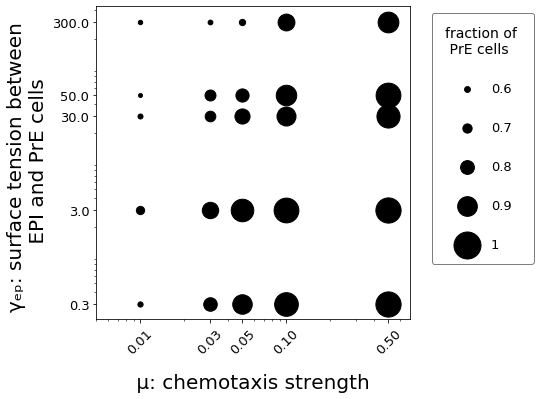

In [11]:
mu = ['0.01', '0.03', '0.05', '0.1', '0.5']
gamma = ['0.3', '3', '30', '50', '300'] 

finalMCS = 200000 
output_frequency = 1000
xaxis = int(finalMCS/output_frequency)

z_interval_size = 2
max_z = 74

number_of_intervals = int(max_z/z_interval_size)

sum_matrix = np.zeros([number_of_intervals, xaxis])

def P_perc_matrix_maker(runnumber):
    #the main part of the calculaions if the same as for the heatmaps
    zCOM_P = []
    MCS_P = []
    zCOM_E = []
    MCS_E = []
    p_perc_upper_half = 0
    p_count_total = 0

    Pcount_matrix = np.zeros([number_of_intervals, xaxis])
    Ecount_matrix = np.zeros([number_of_intervals, xaxis])
    P_percentage_matrix = np.zeros([number_of_intervals, xaxis])

    def fill_matrix(filename, MCS, zCOM, matrix):
        path = r'C:\Users\Wieke Joustra\Documents\BEP\cell_sorting_with_cc3d\Final_Results\Mu_' + currentmu + '\gamma_' + currentgamma
        filepath = path + filename
        with open(filepath) as f: 
            reader = csv.reader(f, delimiter=' ')
            for column in reader:       
                if column != 0:  
                    for row in reader:
                        MCS.append(float(row[0])) #this array contains each MCS multiple times
                        zCOM.append(float(row[4])) 
        
        #now define in which interval of length z_interval_size the current cell's centre of mass fits
        #same as heatmap code
        MCS_counter = 0
        current_MCS = 1000
        
        for i in range(0, len(MCS)): #loop over each cell: multiple cells each MCS
            #define the initial begin and end of the interval: change it when the COM is not in this interval
            begin = 0   #start of the first interval 
            end = z_interval_size  #end of the first interval 
            succeeded = 0 
            
            if current_MCS != MCS[i]: #if we have moved to the next MCS
                current_MCS = MCS[i] #then change the currentMCS value
                MCS_counter +=1 #we need this one to fill 'matrix' in the right index

            while not succeeded: 
                if begin <= zCOM[i] < end: 
                    #0-2 is first interval, 2-4 second, 4-6 third etc. Interval number tracks this
                    interval_number = int(end/z_interval_size-1) #-1 omdat ie begint met tellen op 0
                    matrix[interval_number, MCS_counter] += 1 
                    succeeded = 1
                else:  #as long as the COM is not in the interval, change the interval
                    begin = end 
                    end += z_interval_size

    if currentgamma == '300': 
        fill_matrix('\\' + runnumber + '_numberPcells_mu' + currentmu + '_gamma' + currentgamma  + '.csv', MCS_P, zCOM_P, Pcount_matrix)
    else: 
        fill_matrix('\\numberPcells_' + runnumber + '.csv', MCS_P, zCOM_P, Pcount_matrix)
    
    #this part is different from the heatmap code
    for i in range (0, Pcount_matrix.shape[0]): #36
        #now calculate the percentage of P cells in the upper half of the well. Only do this for the final MCS
        #dont forget that 'above' (location [0][0]) in the matrix means at the bottom of the well
        #I want to have the upper z-coördinates so i need the end of the matrix
        #but first calculate the total number of P cells at the last MCS
        
        p_count_total += Pcount_matrix[i][-2] #the last position ([-1]) is always filled with zeros...?
        if i >= int(number_of_intervals/2): #only calculate for the upper half of the well
            p_perc_upper_half += Pcount_matrix[i][-2]
            
    p_perc_upper_half = p_perc_upper_half/p_count_total

    array.append(p_perc_upper_half) #fill this array with 4 values and then average of these 4 values

#make a nice figure
fig = plt.figure(figsize=(7.5,5.8))

ax = fig.add_subplot()
ax.set_position([0.175,0.18,0.58,0.75])

for currentmu in mu: 
    for currentgamma in gamma:
        array = [] #array that contains the final sorting order values for each gamma, mu combination. 
        #if gamma mu combination changes, the array is made empty and filled again. 
        if currentgamma == '0.3': 
            P_perc_matrix_maker('run1')
            P_perc_matrix_maker('run5')
            P_perc_matrix_maker('run9')
            P_perc_matrix_maker('run13')

        elif currentgamma == '3': 
            P_perc_matrix_maker('run2')
            P_perc_matrix_maker('run6')
            P_perc_matrix_maker('run10')
            P_perc_matrix_maker('run14')

        elif currentgamma == '30': 
            P_perc_matrix_maker('run3')
            P_perc_matrix_maker('run7')
            P_perc_matrix_maker('run11')
            P_perc_matrix_maker('run15')

        elif currentgamma == '50': 
            P_perc_matrix_maker('run4')
            P_perc_matrix_maker('run8')
            P_perc_matrix_maker('run12')
            P_perc_matrix_maker('run16')
                
        elif currentgamma == '300': 
            if currentmu == '0.01':
                P_perc_matrix_maker('run1'), P_perc_matrix_maker('run2'), P_perc_matrix_maker('run3'), P_perc_matrix_maker('run4')
            elif currentmu == '0.03': 
                P_perc_matrix_maker('run5'), P_perc_matrix_maker('run6'), P_perc_matrix_maker('run7'), P_perc_matrix_maker('run8')
            elif currentmu == '0.05':
                P_perc_matrix_maker('run9'), P_perc_matrix_maker('run10'), P_perc_matrix_maker('run11'), P_perc_matrix_maker('run12')
            elif currentmu == '0.1':
                P_perc_matrix_maker('run13'), P_perc_matrix_maker('run14'), P_perc_matrix_maker('run15'), P_perc_matrix_maker('run16')
            elif currentmu == '0.5': 
                P_perc_matrix_maker('run17'), P_perc_matrix_maker('run18'), P_perc_matrix_maker('run19'), P_perc_matrix_maker('run20')
        
        mean_value = stat.mean(array) #average of the 4 runs that have the same mu and gamma 
        #and then plot this average value.
        ax.scatter(float(currentmu), float(currentgamma), s = (mean_value*3)**6, c='black')

#see code of fig 3.1a for comments on the specifics of the plot
labels = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

for label in labels: 
    ax.scatter([], [], s=(label*3)**6, c="k", label=str(label))

h, l = plt.gca().get_legend_handles_labels()
ax.legend(h[1:], l[1:], title_fontsize = 14, fontsize = 13, labelspacing=2, title="fraction of \n PrE cells", borderpad=1, 
           framealpha=0.5, edgecolor="k", bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xscale('log')
ax.set_yscale('log')

xlabels = [float(value) for value in mu]
ax.set_xticks(xlabels)

ylabels =[0.3, 3, 30, 50, 300]
ax.set_yticks(ylabels)

    
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    tick.label.set_rotation(45)
    
for tick in ax.yaxis.get_major_ticks() :
    tick.label.set_fontsize(13)
    
plt.xlabel('\n \u03BC: chemotaxis strength ', fontsize = 20),
plt.ylabel(u'\u03B3\u2091\u209A: surface tension between \n EPI and PrE cells', 
                                                                     fontsize = 20)
ax.set_xlim(left=0.005)

ax.xaxis.set_label_coords(0.5, -0.1)
ax.xaxis.set_label_coords(0.5, -0.1)

plt.savefig(r'C:\Users\Wieke Joustra\Documents\BEP\Figures\PrEdist.pdf') 